# Attention

- Algorithm 3

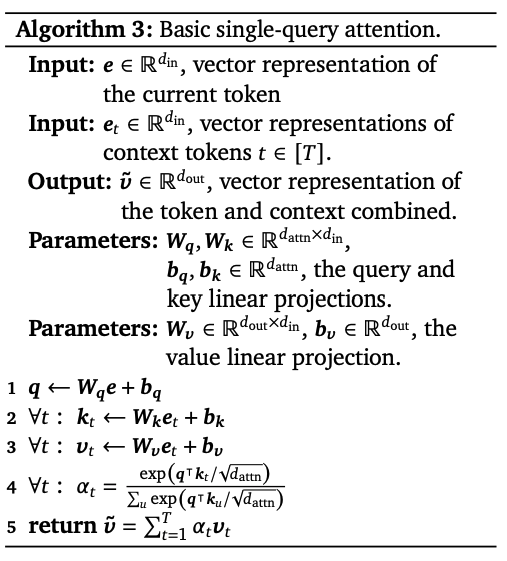


In Algorithm 3, attention gets two inputs $e$ and $e_{t}$.  
- $e$ : vector representations of the current token. 
- $e_{t}$ : vector representations of context tokens $t \in [T]$.  
    * context tokens are the tokens that has contextual information (eg. preceding text or the surrounding text) for predicting the current token.

And its output is $\tilde{t}$, vector representation of the token and context combined with those parameters:
- $W_{q}, W_{k} \in \mathbb{R}^{d_{attn} \times d_{in}}$
- $b_{q}, b_{k} \in \mathbb{R}^{d_{attn}}$, the query and key linear projections
- $W_{v} \in \mathbb{R}^{d_{out} \times d_{in}},b_{v} \in \mathbb{R}^{d_{out}}$, the value linear projection

Attention works as follows:
1. The token currently being predicted is mapped to a *query* vector $\bf{q} \in \mathbb{R}^{d_{attn}}$.
$$
\bf{q} \leftarrow W_{q}e + b_{q}
$$

2. The tokens in the context are mapped to *key* vectors $\bf{k}_{t} \in \mathbb{R}^{d_{attn}}$.
$$
\forall{t}: \bf{k}_t \leftarrow W_{k}e_{t} + b_{q}
$$

3. The tokens in the context are mapped to *value* vectors $\bf{v}_{t} \in \mathbb{R}^{d_{attn}}$.
$$
\forall{t}: \bf{v}_t \leftarrow W_{v}e_{t} + b_{q}
$$

4. The inner products $\bf{q}^{T}\bf{k}_{t}$ are interpreted as the degree to which token $t \in V$ is important for predicting the current token $q$.
$$
\forall{t}: \alpha_t = \frac{\exp({\bf{q}^{T}\bf{k}_{t}/\sqrt{d_{attn}}})}{\sum_{u}{\exp({\bf{q}^{T}\bf{k}_{u}/\sqrt{d_{attn}}})}}
$$

5. Derive a distribution over the context tokens, which is then used to combine the value vectors.
$$
\text{return } \tilde{\bf{v}}=\sum_{t=1}^{T}{\alpha_{t}v_{t}}
$$

## Weight matrix and bias vectors

To implement Algorithm 3, we need weight matrix and bias vector as follows:

1. Query
    - $W_{q} \in \mathbb{R}^{d_{attn} \times d_{in}}$
    - $b_{q} \in \mathbb{R}^{d_{attn}}$
2. Key
    - $W_{k} \in \mathbb{R}^{d_{attn} \times d_{in}}$
    - $b_{k} \in \mathbb{R}^{d_{attn}}$
3. Value
    - $W_{v} \in \mathbb{R}^{d_{out} \times d_{in}}$
    - $b_{v} \in \mathbb{R}^{d_{out}}$

We can generalize those matrix as below:

- $W \in \mathbb{R}^{d_{out_dim} \times d_{in_dim}}$
- $b \in \mathbb{R}^{d_{out_dim}}$

So, to generate thoes weight and vectors we need two argument `in_dim` and `out_dim`.  

In [ ]:
def generate_weight_bias(in_dim, out_dim):
    import numpy as np

    weights = np.array([[i + 1] * in_dim for i in range(out_dim)])
    bias = np.array([i+1 for i in range(out_dim)])
    return weights, bias


In [ ]:
d_attn = 10
d_in = 10
d_out = 10

query_weights, query_bias = generate_weight_bias(d_attn, d_in)
key_weights, key_bias = generate_weight_bias(d_attn, d_in)
value_weights, value_bias = generate_weight_bias(d_in, d_out)

## Implement
### Input Samples
Now, we will implemet attention main logics step by step.  
Assume that we have vectors like below:

In [ ]:
import numpy as np


current_vector = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
context_vectors = np.array(
    [
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    ]
)


### 1. Query Mapping
Define a function that implements below:

1. The token currently being predicted is mapped to a *query* vector $\bf{q} \in \mathbb{R}^{d_{attn}}$.

Function will get three arguments:
- Parameters:
    - $W_{q}$: `query_weights`
    - $b_{q}$: `query_bias`
- Currently predicted vector: `current_vector`

In [ ]:
def query_mapping(current_vector, query_weights, query_bias):
    query_vector = query_weights.dot(current_vector) + query_bias
    return query_vector

In [ ]:
query_vector = query_mapping(current_vector, query_weights, query_bias)
query_vector

array([ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110])

### 2. Key Maping

Define a function that implements below:

2. The tokens in the context are mapped to *key* vectors $\bf{k}_{t} \in \mathbb{R}^{d_{attn}}$.
$$
\forall{t}: \bf{k}_t \leftarrow W_{k}e_{t} + b_{q}
$$

Function will get three arguments:
- Parameters:
    - $W_{q}$: `key_weights`
    - $b_{q}$: `key_bias`
- Context vectors: `context_vector`

In [ ]:
def key_mapping(context_vectors, key_weights, key_bias):
    key_vectors = []
    for context_vector in context_vectors:
        key_vector = key_weights.dot(context_vector) + key_bias
        key_vectors.append(key_vector)
    return np.stack(key_vectors)

In [ ]:
key_vectors = key_mapping(context_vectors, key_weights, key_bias)
key_vectors

array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
       [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
       [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]])

### 3. Value Mapping
Define a function that implements below:

3. The tokens in the context are mapped to *value* vectors $\bf{v}_{t} \in \mathbb{R}^{d_{attn}}$.
$$
\forall{t}: \bf{v}_t \leftarrow W_{v}e_{t} + b_{q}
$$

Function will get three arguments:
- Parameters:
    - $W_{q}$: `value_weights`
    - $b_{q}$: `value_bias`
- Context vectors: `context_vector`

In [ ]:
def value_mapping(context_vectors, value_weights, value_bias):
    # solution 1
    value_vectors = []
    for context_vector in context_vectors:
        value_vector = value_weights.dot(context_vector) + value_bias
        value_vectors.append(value_vector)
    # solution 2
    # value_vectors = value_weights.dot(context_vectors.T).T + value_bias
    return np.stack(value_vectors)

In [ ]:
value_vectors = value_mapping(context_vectors, value_weights, value_bias)
value_vectors

array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
       [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
       [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]])

### 4. Softmax
Define a function that implements below:

4. The inner products $\bf{q}^{T}\bf{k}_{t}$ are interpreted as the degree to which token $t \in V$ is important for predicting the current token $q$.
$$
\forall{t}: \alpha_t = \frac{\exp({\bf{q}^{T}\bf{k}_{t}/\sqrt{d_{attn}}})}{\sum_{u}{\exp({\bf{q}^{T}\bf{k}_{u}/\sqrt{d_{attn}}})}}
$$

Function will get three arguments `query_vector`, `key_vectors` and `d_attn`.  
Note that result of this function is equal to softmax function.

First, define a function that implements inner product between query_vector and one key_vector.


In [ ]:
def inner_product_query_key(query_vector, key_vector, d_attn):
    from math import sqrt

    alpha = query_vector.dot(key_vector) / sqrt(d_attn)
    return alpha

In [ ]:
alpha = inner_product_query_key(query_vector, key_vectors[0], d_attn)
alpha

28123.71637070748

Second, define a function that implements inner product between query_vector and all key_vectors.  
Use `inner_product_query_key` function we have defined.

In [ ]:
def inner_product_query_keys(query_vector, key_vectors, d_attn):
    alphas = []
    for key_vector in key_vectors:
        alpha = inner_product_query_key(query_vector, key_vector, d_attn)
        alphas.append(alpha)
    return np.array(alphas)

Length of `alphas` should be eqaul to length of `context_vectors`.  
In this tutorial it should be 3.

In [ ]:
alphas = inner_product_query_keys(query_vector, key_vectors, d_attn)
alphas

array([28123.71637071, 41515.96226152, 54908.20815233])

Finally, make an softmax function using `alphas`.

In [ ]:
def softmax(alphas):
    scores = alphas / alphas.sum()
    return scores

Sum of score should be equal to 1.

In [ ]:
scores = softmax(alphas)
sum(scores)

1.0

### 5. Final output
Define a function that implements below:

5. Derive a distribution over the context tokens, which is then used to combine the value vectors.
$$
\text{return } \tilde{\bf{v}}=\sum_{t=1}^{T}{\alpha_{t}v_{t}}
$$

Function will get two arguments `value_vectors` and `scores`.

In [ ]:
def combine_value_score(value_vectors, scores):
    outputs = scores.dot(value_vectors)
    return outputs

Length of `outputs` should be equal to `d_out`

In [ ]:
outputs = combine_value_score(value_vectors, scores)
len(outputs), d_out

(10, 10)

### Aggregate

Now, aggregate all functions we defined before.

In [ ]:
def attention(
    current_vector, context_vectors, query_weights, key_weights, value_weights, query_bias, key_bias, value_bias, d_attn
):
    # 1. Query Mapping
    query_vector = query_mapping(current_vector, query_weights, query_bias)
    # 2. Key Mapping
    key_vectors = key_mapping(context_vectors, key_weights, key_bias)
    # 3. Value Mapping
    value_vectors = value_mapping(context_vectors, value_weights, value_bias)
    # 4. Softmax
    alphas = inner_product_query_keys(query_vector, key_vectors, d_attn)
    scores = softmax(alphas)
    # 5. final output
    outputs = combine_value_score(value_vectors, scores)
    return outputs


In [ ]:
attn_hidden = attention(current_vector, context_vectors, query_weights, key_weights, value_weights, query_bias, key_bias, value_bias, d_attn)
attn_hidden

array([ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
       165.75268817, 198.90322581, 232.05376344, 265.20430108,
       298.35483871, 331.50537634])

# Mask Attention

> There are many ways the basic attention mechanism is used in transformers.
> - Bidrectional / unmasked self-attention
> - Unidrectional / masked self-attention
> - Cross-attention


- Algorithm 4

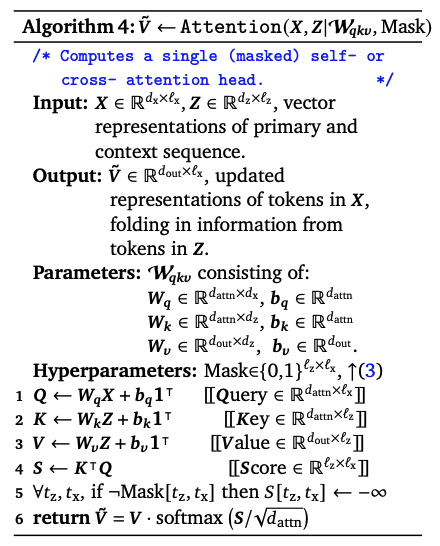


In Algorithm 4, masked attention gets two inputs $\bf{X} \in \mathbb{R}^{d_{x} \times l_{X}}$ and $\bf{Z} \in \mathbb{R}^{d_{z} \times l_{z}}$.
- $\bf{X}$ : vector representation of primary
- $\bf{Z}$ : vector representation of context sequence

And its output $\tilde{\bf{V}} \in \mathbb{R}^{d_{out} \times l_{z}}$, updated representations of tokens in $\bf{X}$, folding in infromation from tokens in $\bf{Z}$ with those parameters and hyperparameters:

**Parameters**
- $W_{q} \in \mathbb{R}^{d_{attn} \times d_{X}}, b_{q} \in \mathbb{R}^{d_{attn}}$
- $W_{k} \in \mathbb{R}^{d_{attn} \times d_{Z}}, b_{k} \in \mathbb{R}^{d_{attn}}$
- $W_{v} \in \mathbb{R}^{d_{out} \times d_{Z}}, b_{v} \in \mathbb{R}^{d_{out}}$

**Hyper Parameters**
- $\text{Mask} \in \{0,1\}^{l_{Z}\times l_{X}}$


- Softmax function with matrix form

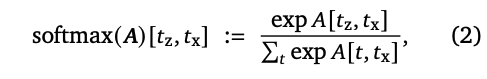


- Mask function with matrix form

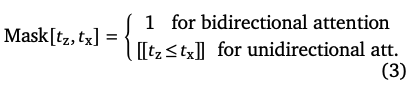


Masked Attention works as follows:  
1. $\bf{Q} \leftarrow W_{q}\bf{X} + b_{q}\bf{1}^T$
2. $\bf{K} \leftarrow W_{k}\bf{X} + b_{k}\bf{1}^T$
3. $\bf{V} \leftarrow W_{v}\bf{X} + b_{v}\bf{1}^T$
4. $\bf{S} \leftarrow \bf{K}^{T}Q$
5. $\forall{t_{Z},t_{X}} \text{ if }\neg\text{Mask}[t_{Z}, t_{X}]$ then $S[t_{Z}, t_{X}] \leftarrow - \infty$
6. $\text{return } \tilde{\bf{V}}=\bf{V} \cdot \text{softmax } (\bf{S}/\sqrt{d_{attn}})$


## Implement
### Input Sample
Now, we will implemet attention main logics step by step.  
Assume that we have matrix, which row is words and column is embed, like below:

In [ ]:
import numpy as np


current_matrix = np.array(
    [
        [1] * 10,
        [2] * 10,
        [3] * 10,
    ]
)
context_matrix = np.array(
    [
        [
            [2] * 10,
            [3] * 10,
            [4] * 10,
        ],
        [
            [3] * 10,
            [4] * 10,
            [5] * 10,
        ],
        [
            [4] * 10,
            [5] * 10,
            [6] * 10,
        ],
    ]
)


In [ ]:
current_matrix

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [ ]:
context_matrix

array([[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]],

       [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]],

       [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]])

### 1. Query Mapping
Define a function that implements below:

$$
\bf{Q} \leftarrow W_{q}\bf{X} + b_{q}\bf{1}^T
$$

Function will get three arguments:
- Parameters:
    - $W_{q}$: `query_weights`
    - $b_{q}$: `query_bias`
- Currently predicted matrix: `current_matrix`

*Hint*: use `query_mapping` for each token and concat results.

In [ ]:
def masked_query_mapping(current_matrix, query_weights, query_bias):
    query_matrix = []
    for current_vector in current_matrix:
        query_vector = query_mapping(current_vector, query_weights, query_bias)
        query_matrix.append(query_vector)
    return np.stack(query_matrix)

In [ ]:
query_matrix = masked_query_mapping(current_matrix, query_weights, query_bias)
query_matrix

array([[ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110],
       [ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
       [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310]])

`query_matrix[0]` and `query_vector` should be equal.

In [ ]:
query_matrix[0], query_vector

(array([ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110]),
 array([ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110]))

### 2. Key Maping

Define a function that implements below:

$$
\bf{K} \leftarrow W_{k}\bf{X} + b_{k}\bf{1}^T
$$

Function will get three arguments:
- Parameters:
    - $W_{k}$: `key_weights`
    - $b_{k}$: `key_bias`
- Context matrix: `context_matrix`

*Hint*: use `key_mapping` for each token and concat results.

In [ ]:
def masked_key_mapping(context_matrix, key_weights, key_bias):
    key_matrix = []
    for context_vector in context_matrix:
        key_vector = key_mapping(context_vector, key_weights, key_bias)
        key_matrix.append(key_vector)
    return np.stack(key_matrix)

In [ ]:
key_matrix = masked_key_mapping(context_matrix, key_weights, key_bias)
key_matrix

array([[[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]],

       [[ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410],
        [ 51, 102, 153, 204, 255, 306, 357, 408, 459, 510]],

       [[ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410],
        [ 51, 102, 153, 204, 255, 306, 357, 408, 459, 510],
        [ 61, 122, 183, 244, 305, 366, 427, 488, 549, 610]]])

`key_matrix[0]` and `key_vectors` should be equal.

In [ ]:
key_matrix[0], key_vectors

(array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]]),
 array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]]))

### 3. Value Mapping

Define a function that implements below:

$$
\bf{V} \leftarrow W_{v}\bf{X} + b_{v}\bf{1}^T
$$

Function will get three arguments:
- Parameters:
    - $W_{v}$: `value_weights`
    - $b_{v}$: `value_bias`
- Context matrix: `context_matrix`

*Hint*: use `value_mapping` for each token and concat results.

In [ ]:
def masked_value_mapping(context_matrix, value_weights, value_bias):
    value_matrix = []
    for context_vector in context_matrix:
        value_vector = value_mapping(context_vector, value_weights, value_bias)
        value_matrix.append(value_vector)
    return np.stack(value_matrix)

In [ ]:
value_matrix = masked_value_mapping(context_matrix, value_weights, value_bias)
value_matrix

array([[[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]],

       [[ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410],
        [ 51, 102, 153, 204, 255, 306, 357, 408, 459, 510]],

       [[ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410],
        [ 51, 102, 153, 204, 255, 306, 357, 408, 459, 510],
        [ 61, 122, 183, 244, 305, 366, 427, 488, 549, 610]]])

`value_matrix[0]` and `value_vectors` should be equal.

In [ ]:
value_matrix[0], value_vectors

(array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]]),
 array([[ 21,  42,  63,  84, 105, 126, 147, 168, 189, 210],
        [ 31,  62,  93, 124, 155, 186, 217, 248, 279, 310],
        [ 41,  82, 123, 164, 205, 246, 287, 328, 369, 410]]))

### 4. Calucate Score
Define a function that implements below:

$$
\bf{S} \leftarrow \bf{K}^{T}Q
$$

Function will get two arguments `query_matrix`, `key_matrix`.  

First, define a function that implements inner product between query_matrix and one key_matrix.  
*Hint*: use `inner_product_query_keys` for each token with `d_attn=1` and concat results. `d_attn` will be calucated after in masked attention.

In [ ]:
def inner_product_query_key_matrix(query_matrix, key_matrix):
    alpha_matrix = []
    for query_vector, key_vectors in zip(query_matrix, key_matrix):
        alphas = inner_product_query_keys(query_vector, key_vectors, d_attn=1)
        alpha_matrix.append(alphas)
    return np.stack(alpha_matrix)

In [ ]:
alpha_matrix = inner_product_query_key_matrix(query_matrix, key_matrix)
alpha_matrix

array([[ 88935., 131285., 173635.],
       [250635., 331485., 412335.],
       [489335., 608685., 728035.]])

### 5. Masking

Assume that there is a mask matrix below:

In [ ]:
mask_matrix = np.array([
    [0]*len(context_matrix[0]),
    [0]*len(context_matrix[0]),
    [0]*len(context_matrix[0]),
])
mask_matrix[1, 1] = 1
mask_matrix[2, 2] = 1
mask_matrix

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Define a function that implements below:

$$
\forall{t_{Z},t_{X}} \text{ if }\neg\text{Mask}[t_{Z}, t_{X}] \text{ then }S[t_{Z}, t_{X}] \leftarrow - \infty
$$

Function will get two arguments `alpha_matrix` and `mask_matrix`.

In [ ]:
def mask_score(alpha_matrix, mask_matrix):
    masked_alpha = alpha_matrix.copy()
    masked_alpha[mask_matrix==1] = 1
    return masked_alpha

In [ ]:
masked_alpha = mask_score(alpha_matrix, mask_matrix)
masked_alpha

array([[8.89350e+04, 1.31285e+05, 1.73635e+05],
       [2.50635e+05, 1.00000e+00, 4.12335e+05],
       [4.89335e+05, 6.08685e+05, 1.00000e+00]])

### 6. Final output
Define a function that implements below:

$$
\text{return } \tilde{\bf{V}}=\bf{V} \cdot \text{softmax } (\bf{S}/\sqrt{d_{attn}})
$$

Function will get three arguments `value_matrix`, `alpha_matrix` and `d_attn`.

First, calucate softmax with `alpha_matrix`.  
*Hint*: use `softmax` for each token and concat results.

In [ ]:
def masked_softmax(alpha_matrix, d_attn):
    scores = []
    for alphas in alpha_matrix:
        score = softmax(alphas/d_attn)
        scores.append(score)
    return np.stack(scores)

In [ ]:
masked_scores = masked_softmax(alpha_matrix, d_attn)
masked_scores

array([[0.22580645, 0.33333333, 0.44086022],
       [0.25203252, 0.33333333, 0.41463415],
       [0.26797386, 0.33333333, 0.39869281]])

`masked_scores[0]` and `scores` should be equal.

In [ ]:
masked_scores[0], scores

(array([0.22580645, 0.33333333, 0.44086022]),
 array([0.22580645, 0.33333333, 0.44086022]))

Next combine `value_matrix` and `masked_scores`.

In [ ]:
def combine_value_masked_score(value_matrix, masked_scores):
    outputs = []
    for value_vectors, scores in zip(value_matrix, masked_scores):
        output = combine_value_score(value_vectors, scores)
        outputs.append(output)
    return np.stack(outputs)

In [ ]:
masked_outputs = combine_value_masked_score(value_matrix, masked_scores)
masked_outputs

array([[ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634],
       [ 42.62601626,  85.25203252, 127.87804878, 170.50406504,
        213.1300813 , 255.75609756, 298.38211382, 341.00813008,
        383.63414634, 426.2601626 ],
       [ 52.30718954, 104.61437908, 156.92156863, 209.22875817,
        261.53594771, 313.84313725, 366.1503268 , 418.45751634,
        470.76470588, 523.07189542]])

`masked_outputs[0]` and `outputs` should be equal.

In [ ]:
masked_outputs[0], outputs

(array([ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634]),
 array([ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634]))

### Aggregate

Now, aggregate all functions we defined before.

In [ ]:
def masked_attention(
    current_matrix,
    context_matrix,
    mask_matrix,
    query_weights,
    key_weights,
    value_weights,
    query_bias,
    key_bias,
    value_bias,
    d_attn,
):
    # 1. Query Mapping
    query_matrix = masked_query_mapping(current_matrix, query_weights, query_bias)
    # 2. Key Mapping
    key_matrix = masked_key_mapping(context_matrix, key_weights, key_bias)
    # 3. Value Mapping
    value_matrix = masked_value_mapping(context_matrix, value_weights, value_bias)
    # 4. Calucate Score
    alpha_matrix = inner_product_query_key_matrix(query_matrix, key_matrix)
    # 5. Maksing
    masked_alpha = mask_score(alpha_matrix, mask_matrix)
    # 6. Final output
    masked_scores = masked_softmax(alpha_matrix, d_attn)
    masked_outputs = combine_value_masked_score(value_matrix, masked_scores)
    return masked_outputs


In [ ]:
masked_attn_hidden = masked_attention(
    current_matrix,
    context_matrix,
    mask_matrix,
    query_weights,
    key_weights,
    value_weights,
    query_bias,
    key_bias,
    value_bias,
    d_attn,
)
masked_attn_hidden

array([[ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634],
       [ 42.62601626,  85.25203252, 127.87804878, 170.50406504,
        213.1300813 , 255.75609756, 298.38211382, 341.00813008,
        383.63414634, 426.2601626 ],
       [ 52.30718954, 104.61437908, 156.92156863, 209.22875817,
        261.53594771, 313.84313725, 366.1503268 , 418.45751634,
        470.76470588, 523.07189542]])

# Multi Head Attention

- Algorithm 5

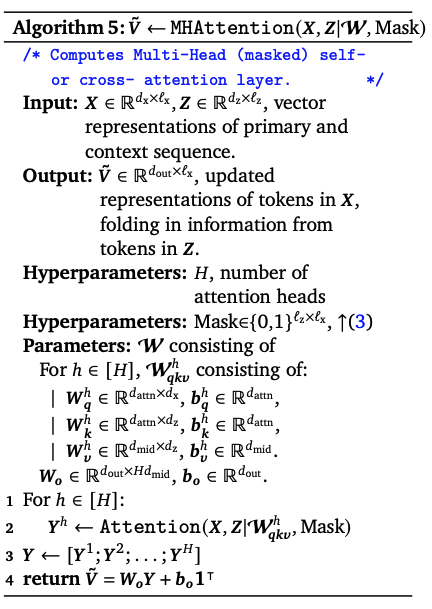

In Algorithm 5, multi-head attention gets two inputs $\bf{X} \in \mathbb{R}^{d_{x} \times l_{X}}$ and $\bf{Z} \in \mathbb{R}^{d_{z} \times l_{z}}$.
- $\bf{X}$ : vector representation of primary
- $\bf{Z}$ : vector representation of context sequence

And its output $\tilde{\bf{V}} \in \mathbb{R}^{d_{out} \times l_{z}}$, updated representations of tokens in $\bf{X}$, folding in infromation from tokens in $\bf{Z}$ with those parameters and hyperparameters:

**Parameters**
- For $h \in [H]$
    - $W_{q}^{h} \in \mathbb{R}^{d_{attn} \times d_{X}}, b_{q}^{h} \in \mathbb{R}^{d_{attn}}$
    - $W_{k}^{h} \in \mathbb{R}^{d_{attn} \times d_{Z}}, b_{k}^{h} \in \mathbb{R}^{d_{attn}}$
    - $W_{v}^{h} \in \mathbb{R}^{d_{out} \times d_{Z}}, b_{v}^{h} \in \mathbb{R}^{d_{out}}$

**Hyper Parameters**
- $H$, Number of attention heads
- $\text{Mask} \in \{0,1\}^{l_{Z}\times l_{X}}$

Multi-Head Attention works as follows:  
1. For $h \in [H]$  
        $\bf{Y}^{h} \gets \text{Attention}(\bf{X},\bf{Z}|\bf{W}_{qkv}^{h},\text{Mask})$
2. $\bf{Y} \gets [\bf{Y}^{1}; \bf{Y}^{2}; ...;\bf{Y}^{H}]$
3. $\text{return } \tilde{\bf{V}}=\bf{W}_{0}\bf{Y}+\bf{b}_{0}\bf{1}^T$


## Multi-head Weight matrix and bias

To implement Algorithm 5, we need $h$ set of weight matrix and bias vector as follows:

- For $h \in [H]$:
    1. Query
        - $W_{q}^{h} \in \mathbb{R}^{d_{attn} \times d_{X}}$
        - $b_{q}^{h} \in \mathbb{R}^{d_{attn}}$
    2. Key
        - $W_{k}^{h} \in \mathbb{R}^{d_{attn} \times d_{X}}$
        - $b_{k}^{h} \in \mathbb{R}^{d_{attn}}$
    3. Value
        - $W_{v}^{h} \in \mathbb{R}^{d_{mid} \times d_{Z}}$
        - $b_{v}^{h} \in \mathbb{R}^{d_{mid}}$
- Combine weight and bias
    - $W_{o} \in \mathbb{R}^{d_{out} \times Hd_{mid}}$
    - $b_{o} \in \mathbb{R}^{d_{out}}$

To generate thoes set of weight and vectors we need four argument `n_head`, `d_attn`, `d_in` and `d_out`.  

First, define a function thate generates a set of qeury, key, value weights and bias.

*Hint*: use `generate_weight_bias` for haad and concat results.

In [ ]:
def head_weights(d_attn, d_in, d_out):
    query_weights, query_bias = generate_weight_bias(d_attn, d_in)
    query_dict = {
        "weight": query_weights,
        "bias": query_bias
    }
    key_weights, key_bias = generate_weight_bias(d_attn, d_in)
    key_dict = {
        "weight": key_weights,
        "bias": key_bias
    }
    value_weights, value_bias = generate_weight_bias(d_in, d_out)
    value_dict = {
        "weight": value_weights,
        "bias": value_bias
    }
    return query_dict, key_dict, value_dict

Next, define a function that generates $h$ sets of qeury, key, value weights and bias.

In [ ]:
def multi_head_weights(n_head, d_attn, d_in, d_out):
    query_weight_dict = {"weight":[], "bias": []}
    key_weight_dict = {"weight":[], "bias": []}
    value_weight_dict = {"weight":[], "bias": []}
    for i in range(n_head):
        query_dict, key_dict, value_dict = head_weights(d_attn, d_in, d_out)
        query_weight_dict["weight"].append(query_dict["weight"])
        query_weight_dict["bias"].append(query_dict["bias"])
        key_weight_dict["weight"].append(key_dict["weight"])
        key_weight_dict["bias"].append(key_dict["bias"])
        value_weight_dict["weight"].append(value_dict["weight"])
        value_weight_dict["bias"].append(value_dict["bias"])
    query_weight_dict["weight"] = np.stack(query_weight_dict["weight"])
    query_weight_dict["bias"] = np.stack(query_weight_dict["bias"])
    key_weight_dict["weight"] = np.stack(key_weight_dict["weight"])
    key_weight_dict["bias"] = np.stack(key_weight_dict["bias"])
    value_weight_dict["weight"] = np.stack(value_weight_dict["weight"])
    value_weight_dict["bias"] = np.stack(value_weight_dict["bias"])
    return query_weight_dict, key_weight_dict, value_weight_dict

In [ ]:
n_head = 4
d_attn = 10
d_in = 10
d_out = 10
query_weight_dict, key_weight_dict, value_weight_dict = multi_head_weights(n_head, d_attn, d_in, d_out)
query_weight_dict, key_weight_dict, value_weight_dict


({'weight': array([[[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
          [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
          [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
          [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
          [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
          [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
          [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
          [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
          [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
          [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]],
  
         [[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
          [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
          [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
          [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
          [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
          [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
          [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
          [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
          [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9]

Finally, define a function thate generates combine weights and bias.  
Its `d_in` is  `n_head` * `d_out`.

In [ ]:
combine_weights, combine_bias = generate_weight_bias(n_head*d_out, d_out)

In [ ]:
combine_weights.shape

(10, 40)

## Implement

### 1. Calcuate attention score for each head

Define a function that implements below:

For $h \in [H]$  
    $\bf{Y}^{h} \gets \text{Attention}(\bf{X},\bf{Z}|\bf{W}_{qkv}^{h},\text{Mask})$

*Hint*: use `masked_attention` for each head and concat results.

In [ ]:
def multi_head_masked_attention(
    current_matrix,
    context_matrix,
    mask_matrix,
    query_weight_dict,
    key_weight_dict,
    value_weight_dict,
    d_attn,
    n_head,
):
    query_weights = query_weight_dict["weight"]
    key_weights = key_weight_dict["weight"]
    value_weights = value_weight_dict["weight"]
    query_biases = query_weight_dict["bias"]
    key_biases = key_weight_dict["bias"]
    value_biases = value_weight_dict["bias"]
    multi_head_outputs = []
    for i in range(n_head):
        masked_output = masked_attention(
            current_matrix,
            context_matrix,
            mask_matrix,
            query_weights[i],
            key_weights[i],
            value_weights[i],
            query_biases[i],
            key_biases[i],
            value_biases[i],
            d_attn,
        )
        multi_head_outputs.append(masked_output)
    return np.stack(multi_head_outputs)

In [ ]:
multi_head_outputs = multi_head_masked_attention(
    current_matrix,
    context_matrix,
    mask_matrix,
    query_weight_dict,
    key_weight_dict,
    value_weight_dict,
    d_attn,
    n_head,
)
multi_head_outputs

array([[[ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
         165.75268817, 198.90322581, 232.05376344, 265.20430108,
         298.35483871, 331.50537634],
        [ 42.62601626,  85.25203252, 127.87804878, 170.50406504,
         213.1300813 , 255.75609756, 298.38211382, 341.00813008,
         383.63414634, 426.2601626 ],
        [ 52.30718954, 104.61437908, 156.92156863, 209.22875817,
         261.53594771, 313.84313725, 366.1503268 , 418.45751634,
         470.76470588, 523.07189542]],

       [[ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
         165.75268817, 198.90322581, 232.05376344, 265.20430108,
         298.35483871, 331.50537634],
        [ 42.62601626,  85.25203252, 127.87804878, 170.50406504,
         213.1300813 , 255.75609756, 298.38211382, 341.00813008,
         383.63414634, 426.2601626 ],
        [ 52.30718954, 104.61437908, 156.92156863, 209.22875817,
         261.53594771, 313.84313725, 366.1503268 , 418.45751634,
         470.76470588, 523.0

Size of `multi_head_outputs` is equal to `n_head`.

In [ ]:
len(multi_head_outputs)

4

In [ ]:
n_head

4

### 2. Concat the result of each head

Define a function that implements below:

$$
\bf{Y} \gets [\bf{Y}^{1}; \bf{Y}^{2}; ...;\bf{Y}^{H}]
$$

Concat the result of each head.

In [ ]:
def concat_multi_head(multi_head_outputs):
    multi_head_outputs_t = multi_head_outputs.transpose(1,0,2)
    size = len(multi_head_outputs_t)
    multi_head_outputs_t = multi_head_outputs_t.reshape(size, -1)
    return multi_head_outputs_t

In [ ]:
concat_multi_head_outputs = concat_multi_head(multi_head_outputs)
concat_multi_head_outputs

array([[ 33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634,  33.15053763,  66.30107527,
         99.4516129 , 132.60215054, 165.75268817, 198.90322581,
        232.05376344, 265.20430108, 298.35483871, 331.50537634,
         33.15053763,  66.30107527,  99.4516129 , 132.60215054,
        165.75268817, 198.90322581, 232.05376344, 265.20430108,
        298.35483871, 331.50537634,  33.15053763,  66.30107527,
         99.4516129 , 132.60215054, 165.75268817, 198.90322581,
        232.05376344, 265.20430108, 298.35483871, 331.50537634],
       [ 42.62601626,  85.25203252, 127.87804878, 170.50406504,
        213.1300813 , 255.75609756, 298.38211382, 341.00813008,
        383.63414634, 426.2601626 ,  42.62601626,  85.25203252,
        127.87804878, 170.50406504, 213.1300813 , 255.75609756,
        298.38211382, 341.00813008, 383.63414634, 426.2601626 ,
         42.62601626,  85.25203252, 127

`concat_multi_head_outputs` shape must be looks like `len(current_matrix)`, `n_head`*`n_dim`.

In [ ]:
concat_multi_head_outputs.shape

(3, 40)

In [ ]:
len(current_matrix), n_head*d_out

(3, 40)

### 3. Combine concated result with weight and bias

Define a function that implements below:

$$
\bf{Y} \gets [\bf{Y}^{1}; \bf{Y}^{2}; ...;\bf{Y}^{H}]
$$

Concat the result of each head.

In [ ]:
def combine_multi_head_outputs(concat_multi_head_outputs, combine_weights, combine_bias):
    combined_outputs = combine_weights.dot(concat_multi_head_outputs.T).T + combine_bias
    return combined_outputs

In [ ]:
combined_outputs = combine_multi_head_outputs(concat_multi_head_outputs, combine_weights, combine_bias)
combined_outputs

array([[  7294.11827957,  14588.23655914,  21882.35483871,
         29176.47311828,  36470.59139785,  43764.70967742,
         51058.82795699,  58352.94623656,  65647.06451613,
         72941.1827957 ],
       [  9378.72357724,  18757.44715447,  28136.17073171,
         37514.89430894,  46893.61788618,  56272.34146341,
         65651.06504065,  75029.78861789,  84408.51219512,
         93787.23577236],
       [ 11508.58169935,  23017.16339869,  34525.74509804,
         46034.32679739,  57542.90849673,  69051.49019608,
         80560.07189542,  92068.65359477, 103577.23529412,
        115085.81699346]])